# Converting audio file to spectrogram

In [1]:
import numpy, scipy, matplotlib.pyplot as plt, librosa, pandas as pd, IPython.display as ipd
import librosa.display
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

## Load in the data

Load in a sample .mp3 file (2 songs)
- Sampling rate: 22050 Hz (sampling rate is the number of samples per second)
- Take 10 second slices from song

In [2]:
sampling_rate = 22050

In [3]:
x1, sr = librosa.load("./Data/sample/223851941811134170.wav", sr=sampling_rate, mono=True, duration=10.0)
x2, sr = librosa.load("./Data/sample/6587500978343584472.wav", sr=sampling_rate, mono=True, duration=10.0)
x3, sr = librosa.load("./Data/sample/8974267727890074102.wav", sr=sampling_rate, mono=True, duration=10.0)

Get the genres of these songs

In [4]:
# Get the labels and corresponding genres from train.csv
train_labels = pd.read_csv("./Data/train.csv", names=["Filename", "Label"])
genres = pd.read_csv("./Data/genres.csv", names=["Label", "Genre"])
df = pd.merge(train_labels, genres)

# Dictionary of genres
genresDict = {}
for index, row in df.iterrows():
    genresDict[row['Filename'].split('.')[0]] = row['Genre']
    
# Print the labels of the songs
print("The genre of song 1 is " + genresDict['223851941811134170'])
print("The genre of song 2 is " + genresDict['6587500978343584472'])
print("The genre of song 3 is " + genresDict['8974267727890074102'])

The genre of song 1 is Nhạc Không Lời
The genre of song 2 is Nhạc Trữ Tình
The genre of song 3 is Nhạc Thiếu Nhi


Plot the waveplots for each song

Text(0.5,1,'Nhạc Thiếu Nhi')

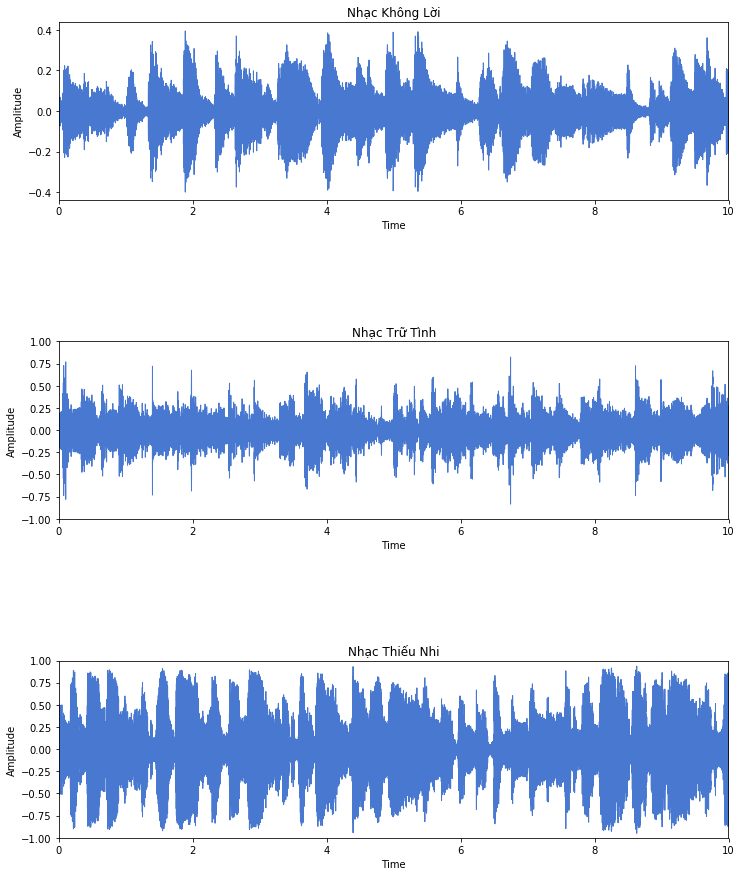

In [15]:
#Waveplot - Time Domain

fig=plt.figure(figsize=(12,15))
fig.subplots_adjust(hspace=.8)

# Song 1
plt.subplot(3, 1, 1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x1,sampling_rate)
plt.title(genresDict['223851941811134170'])

# Song 2
plt.subplot(3, 1, 2)
plt.ylim(-1,1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x2,sampling_rate)
plt.title(genresDict['6587500978343584472'])

# Song 3
plt.subplot(3, 1, 3)
plt.ylim(-1,1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x3,sampling_rate)
plt.title(genresDict['8974267727890074102'])

Play the songs

In [6]:
ipd.Audio(x1, rate=sampling_rate)

In [7]:
ipd.Audio(x2, rate=sampling_rate)

In [8]:
ipd.Audio(x3, rate=sampling_rate)

## Fourier Transform

Fourier Transform

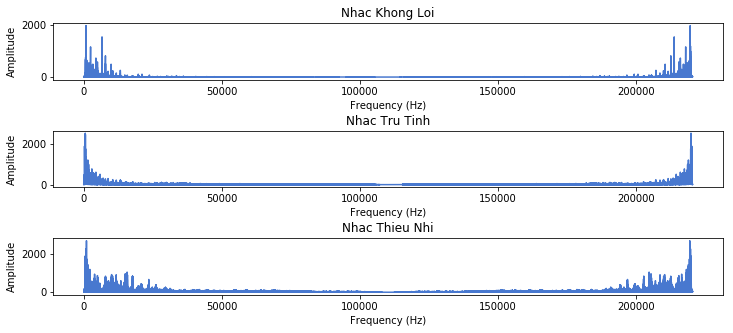

In [9]:
# Fourier Transform and Spectrum

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.9)

plt.subplot(3,1,1)
FFT_1 = scipy.fft(x1)
FFT_1_Mag = numpy.absolute(FFT_1)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Nhac Khong Loi')
plt.plot(FFT_1_Mag)

plt.subplot(3,1,2)
FFT_2 = scipy.fft(x2)
FFT_2_Mag = numpy.absolute(FFT_2)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Nhac Tru Tinh')
plt.plot(FFT_2_Mag)

plt.subplot(3,1,3)
FFT_3 = scipy.fft(x3)
FFT_3_Mag = numpy.absolute(FFT_3)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Nhac Thieu Nhi')
plt.plot(FFT_3_Mag)

Short-Time Fourier Transform
- break up the signal into discrete windows
- each signal within a window is stationary
- obtain spectrogram of the signal after fourier transform over each window
- frame length: number of samples in an analysis window (frame)

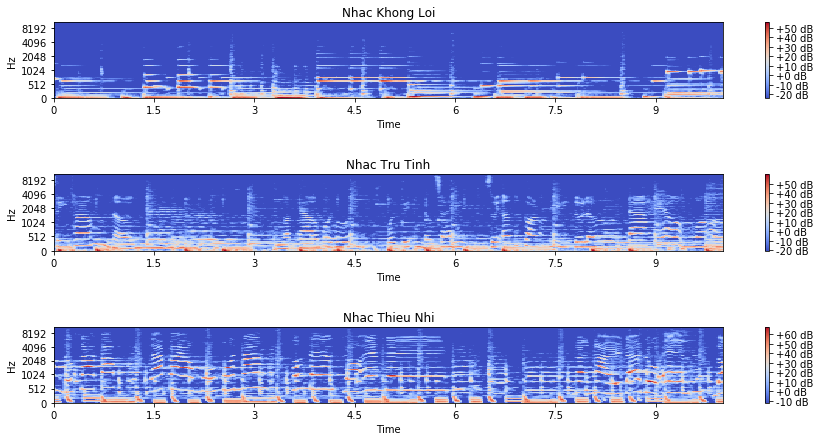

In [10]:
#Short-Time Fourier Transform and Spectrogram

fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=1)

plt.subplot(3,1,1)
# mel-scaled power spectrogram
S1 = librosa.feature.melspectrogram(x1, sr=sampling_rate, n_mels=128)
# convert to log scale (dB)
log_S1 = librosa.amplitude_to_db(S1)
plt.title('Nhac Khong Loi')
librosa.display.specshow(log_S1, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3,1,2)
S2 = librosa.feature.melspectrogram(x2, sr=sampling_rate, n_mels=128)
log_S2 = librosa.amplitude_to_db(S2)
plt.title('Nhac Tru Tinh')
librosa.display.specshow(log_S2, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3,1,3)
S3 = librosa.feature.melspectrogram(x3, sr=sampling_rate, n_mels=128)
log_S3 = librosa.amplitude_to_db(S3)
plt.title('Nhac Thieu Nhi')
librosa.display.specshow(log_S3, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

## Mel-frequency cepstral coefficients (MFCCs)

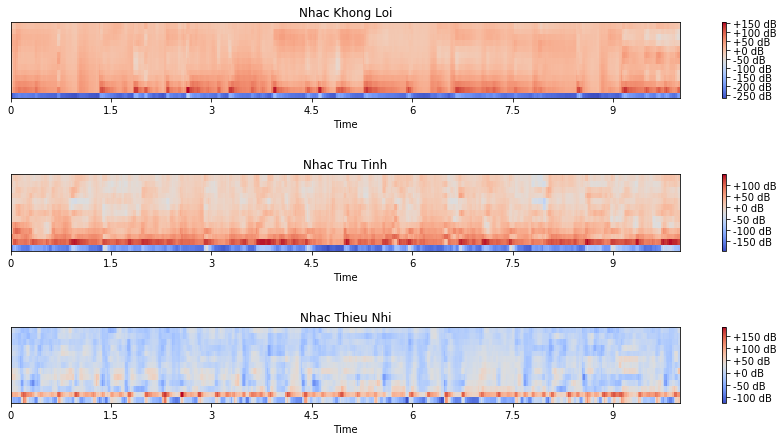

In [11]:
# MFCC and Spectrogram

fig=plt.figure(figsize=(15,7))
fig.subplots_adjust(hspace=1)

plt.subplot(3,1,1)
MFCC_1 = librosa.feature.mfcc(S=log_S1, sr=sampling_rate, n_mfcc=13)
plt.title('Nhac Khong Loi')
librosa.display.specshow(MFCC_1, sr=sampling_rate, x_axis='time')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3,1,2)
MFCC_2 = librosa.feature.mfcc(S=log_S2, sr=sampling_rate, n_mfcc=13)
plt.title('Nhac Tru Tinh')
librosa.display.specshow(MFCC_2, sr=sampling_rate, x_axis='time')
plt.colorbar(format='%+2.0f dB')

plt.subplot(3,1,3)
MFCC_3 = librosa.feature.mfcc(S=log_S3, sr=sampling_rate, n_mfcc=13)
plt.title('Nhac Thieu Nhi')
librosa.display.specshow(MFCC_3, sr=sampling_rate, x_axis='time')
plt.colorbar(format='%+2.0f dB')